In [1]:

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import ticker
import numpy as np
from matplotlib.pyplot import MultipleLocator

%config InlineBackend.figure_format = 'svg'

In [2]:
# initial settings - set plot style
plt.style.use(["science", "no-latex"])

# create numerical sequences
# np.round(np.linspace(i, j, t), decimals=n), Avoid decimal precision issues
t = np.round(np.linspace(1, 2, 11), decimals=1)
c = np.linspace(10, 15, 6)
a = np.linspace(100, 200, 11)
r = np.array([0, 0.02, 0.03, 0.05, 0.07, 0.1, 0.17, 0.25, 0.35, 0.5, 0.7])
b0 = np.round(np.linspace(0.1, 0.9, 9), decimals=1)
b1 = np.round(np.linspace(0.2, 1.0, 9), decimals=1)

# create meshgrid from the numerical sequences
T, R, B0, B1, C, A = np.meshgrid(t, r, b0, b1, c, a, indexing="ij")

# define condition and euqation
condition = B1 > B0
# equation: quantity of firm MNC minus firm LM
equation = B0 * (A - C - T) - B1 * (A - C - C * R) + 3 * (C * R - T)

# The impact of b1 on the equilibrium quantity gap
b1_gap = np.where(condition, equation, np.nan)
b1_abs_dict = {
    b1_val: np.where(
        b1_gap[B1 == b1_val] > 0, 1, np.where(b1_gap[B1 == b1_val] < 0, 0, np.nan)
    )
    for b1_val in b1
}
b1_mean = np.array([np.nanmean(b1_abs_dict[b1_val]) for b1_val in b1_abs_dict])

# The impact of a on the equilibrium quantity gap
a_gap = np.where(condition, equation, np.nan)
a_abs_dict = {}
for a_val in a:
    a_arr = a_gap[A == a_val]
    a_abs = np.where(a_arr > 0, 1, np.where(a_arr < 0, 0, np.nan))
    a_abs_dict[a_val] = a_abs
a_mean = np.array([np.nanmean(a_abs_dict[a_val]) for a_val in a_abs_dict])

# The impact of r on the equilibrium quantity gap
r_gap = np.where(condition, equation, np.nan)
r_abs_dict = {}
for r_val in r:
    r_arr = r_gap[R == r_val]
    r_abs = np.where(r_arr > 0, 1, np.where(r_arr < 0, 0, np.nan))
    r_abs_dict[r_val] = r_abs
r_mean = np.array([np.nanmean(r_abs_dict[r_val]) for r_val in r_abs_dict])

# The impact of t on the equilibrium quantity gap
t_gap = np.where(condition, equation, np.nan)
t_abs_dict = {}
for t_val in t:
    t_arr = t_gap[T == t_val]
    t_abs = np.where(t_arr > 0, 1, np.where(t_arr < 0, 0, np.nan))
    t_abs_dict[t_val] = t_abs
t_mean = np.array([np.nanmean(t_abs_dict[t_val]) for t_val in t_abs_dict])


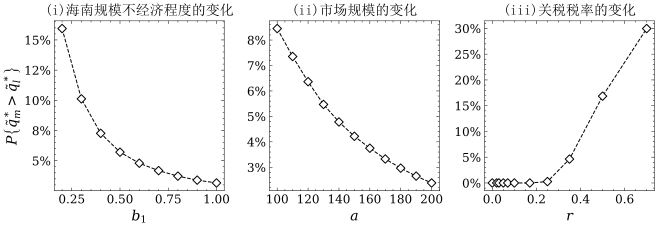

In [8]:
# generate canvas
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(9.4, 3.3), nrows=1, ncols=3)

# set props
props_font_label = fm.FontProperties(size=14)
props_font_title = fm.FontProperties("Simsun", size=14)
props_title = ["(i)海南规模不经济程度的变化", "(ii)市场规模的变化", "(iii)关税税率的变化", "(iv)运输成本的变化"]
props_xlabels = [r"$b_{1}$", r"$a$", r"$r$", r"$t$"]
props_ylabels = [r"$P\left \{ q ̃_m^*>q ̃_l^* \right \}$"]

# plot of ax1 about b1 and b1_mean
ax1.plot(
    b1, b1_mean, linestyle="--", marker="D", color="black", markerfacecolor="white"
)
ax1.set_title(props_title[0], fontproperties=props_font_title)
ax1.set_xlabel(props_xlabels[0], fontproperties=props_font_label)
ax1.set_ylabel(props_ylabels[0], fontproperties=props_font_label)

# plot of ax2 about a and a_mean
ax2.plot(a, a_mean, linestyle="--", marker="D", color="black", markerfacecolor="white")
ax2.set_title(props_title[1], fontproperties=props_font_title)
ax2.set_xlabel(props_xlabels[1], fontproperties=props_font_label)
# Set the x axis scale values ​​at intervals of 20
x_major_locator = MultipleLocator(20)
ax2.xaxis.set_major_locator(x_major_locator)

# plot of ax3 about r and r_mean
ax3.plot(r, r_mean, linestyle="--", marker="D", color="black", markerfacecolor="white")
ax3.set_title(props_title[2], fontproperties=props_font_title)
ax3.set_xlabel(props_xlabels[2], fontproperties=props_font_label)

# set same properties for axes
axes = [ax1, ax2, ax3]
for ax in axes:
    ax.tick_params(labelsize=12)
    # ax.patch.set_alpha(0)
    ax.set_box_aspect(1)
    # ax.grid(linestyle='-.')
    # ax.fill_between(a, 0, a_mean, facecolor='#81b8df', alpha=0.618)
    # ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))


# show plot
fig.tight_layout()
# fig.patch.set_alpha(0)
plt.show()